In [63]:
import mne
import numpy as np

In [64]:
def copy_annotations(file_with_annotations, file_without_annotations):
    # Load the EDF files
    edf_with_annotations = mne.io.read_raw_edf(file_with_annotations, preload=True)
    edf_without_annotations = mne.io.read_raw_edf(file_without_annotations, preload=True)

    # Get the annotations from the first file
    annotations = mne.Annotations(edf_with_annotations.annotations.onset,
                                  edf_with_annotations.annotations.duration,
                                  edf_with_annotations.annotations.description)

    # Adjust the onset of annotations to match the start time of the second file
    time_diff = edf_without_annotations.info['meas_date'] - edf_with_annotations.info['meas_date']
    data = np.pad(edf_without_annotations.get_data(), ((0, 0), (int(time_diff.total_seconds() * edf_without_annotations
                                                           .info['sfreq']), 0)), 'edge')

    # Create a new Raw object with the data from the second file and the annotations from the first file
    info = mne.create_info(ch_names=edf_without_annotations.info['ch_names'],
                           sfreq=edf_without_annotations.info['sfreq'],
                           ch_types=edf_without_annotations.get_channel_types())
    new_raw = mne.io.RawArray(data, info)
    new_raw.set_annotations(annotations)

    # Save the new EDF file
    new_file_path = file_without_annotations.rsplit('.', 1)[0] + '_with_annotations.edf'
    new_raw.export(new_file_path, fmt='edf')

    return new_file_path


In [65]:
with_anno_path = r"I:\My Drive\finger gesture recognition\018\session_2\GR_pos4_018_S2_SD.edf"
without_anno_path = r"I:\My Drive\finger gesture recognition\019\session_1\GR_pos3_019_S1_SD.edf"
new_file = copy_annotations(with_anno_path, without_anno_path)

Extracting EDF parameters from I:\My Drive\finger gesture recognition\018\session_2\GR_pos4_018_S2_SD.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5199999  =      0.000 ...  1300.000 secs...
Extracting EDF parameters from I:\My Drive\finger gesture recognition\019\session_1\GR_pos3_019_S1_SD.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3963999  =      0.000 ...   991.000 secs...
Creating RawArray with float64 data, n_channels=22, n_times=4308000
    Range : 0 ... 4307999 =      0.000 ...  1077.000 secs
Ready.


C:\Users\tomer\AppData\Local\Temp\ipykernel_12156\2914774191.py:20: RuntimeWarning: Omitted 11 annotation(s) that were outside data range.
  new_raw.set_annotations(annotations)


In [59]:
# open the edf file with mne
raw_without_ann = mne.io.read_raw_edf(r"I:\My Drive\finger gesture recognition\019\session_1\GR_pos3_019_S1_SD.edf",
                                      preload=True)

Extracting EDF parameters from I:\My Drive\finger gesture recognition\019\session_1\GR_pos3_019_S1_SD.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4307999  =      0.000 ...  1077.000 secs...


In [60]:
a = raw_without_ann.get_data()

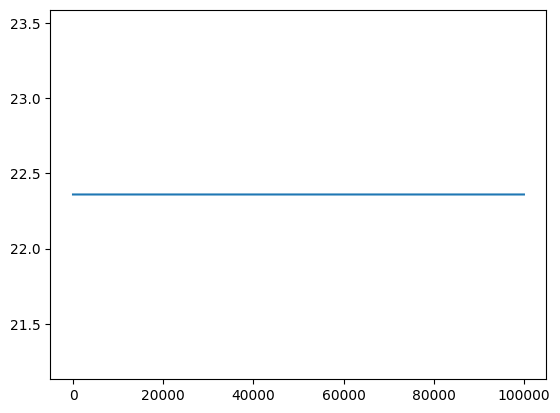

In [61]:
import matplotlib.pyplot as plt
plt.plot(a[0, :100000])